In [1]:
## Set workspace
import os
os.chdir('/Data_analysis_using_Python/Opendata')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.signal import savgol_filter

In [18]:
import pandas as pd
df = pd.read_csv("FTIR_Spectra_olive_oils.csv")

In [7]:
oil = df.values[:,4:].astype(str).astype(float)

In [6]:
wl = pd.read_csv('wavelength.csv')

In [4]:
df.head()

,Number,Group,Countries,808.5395,810.469,812.3985,814.328,816.2575,818.187,820.1165,...,1869.7935,1871.723,1873.6535,1875.583,1877.5125,1879.442,1881.3715,1883.301,1885.2305,1887.16
0,1,1,Greece,0.103753,0.102204,0.092835,0.080931,0.072028,0.070530,0.075836,...,-0.001227,0.001822,0.003450,0.003179,0.002408,0.002580,0.003744,0.003461,0.002774,0.002253
1,1,1,Greece,0.100083,0.100176,0.092805,0.081545,0.072372,0.070033,0.075910,...,-0.000533,0.003187,0.004933,0.005599,0.005409,0.004715,0.004165,0.002345,0.000598,-0.000700
2,2,1,Greece,0.098488,0.095551,0.086662,0.076001,0.069760,0.070162,0.076346,...,-0.000571,0.002750,0.002734,0.002093,0.002579,0.003089,0.003454,0.003874,0.003860,0.002053
3,2,1,Greece,0.097094,0.094137,0.086487,0.077987,0.072729,0.072255,0.076293,...,-0.002233,0.000554,0.003724,0.004299,0.003683,0.003953,0.004128,0.002877,0.001644,0.000653
4,3,1,Greece,0.098733,0.097378,0.089574,0.080488,0.073952,0.072044,0.075082,...,-0.000705,0.003248,0.005718,0.005902,0.004614,0.003489,0.002996,0.001952,0.001568,0.001747


In [5]:
##Data tranformation

In [9]:
w = 5
p = 2
oil_sg = savgol_filter(oil, w, polyorder = p, deriv=1)

In [19]:
label = df.loc[:, "Group"]
data = pd.DataFrame(oil_sg)

In [11]:
##Visualising the dataset

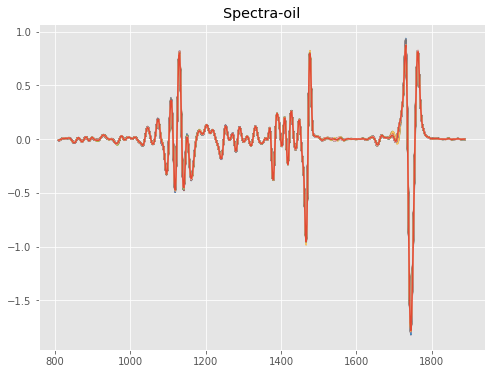

In [17]:
plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    
    plt.plot(wl, oil_sg.T)
    plt.title('Spectra-oil')

In [21]:
from sklearn.cross_decomposition import PLSRegression

In [28]:
plsr = PLSRegression(n_components=2, scale=False) # (1)
plsr.fit(oil_sg, label) # (2)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

In [29]:
plsr.x_scores_

array([[-1.80993903e-02, -1.95515742e-03],
       [-1.26252565e-02,  1.08672206e-02],
       [-3.27813772e-02, -1.24560763e-02],
       [-2.56237169e-02, -3.31421955e-02],
       [-4.27179519e-02,  1.67588621e-02],
       [-4.10869141e-02, -1.78415791e-03],
       [-5.18857492e-02,  1.01261007e-02],
       [-6.34295063e-02,  8.14170188e-03],
       [-4.28095940e-02,  2.44480347e-02],
       [-4.22125799e-02,  3.47413504e-02],
       [-3.57685491e-02,  1.89828278e-02],
       [-4.56082670e-02,  1.92298551e-02],
       [-9.68252838e-03,  4.32481689e-03],
       [-2.41340540e-02,  2.50477399e-02],
       [-1.90883955e-02,  3.73640463e-02],
       [-3.92659794e-02,  1.12589312e-02],
       [-2.43254930e-02,  2.52272782e-02],
       [-4.52965211e-02, -3.01622784e-03],
       [-8.62472876e-02,  4.37978020e-02],
       [-9.27226402e-02,  4.24491045e-02],
       [-1.87096595e-02,  6.22941595e-02],
       [-2.13865241e-02,  1.74786779e-02],
       [-1.82382578e-02,  3.04394604e-02],
       [ 6.

In [30]:
plsr.x_weights_.shape

(559, 2)

Text(0, 0.5, 'Scores on LV 2')

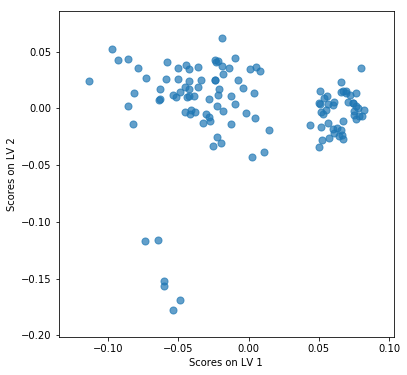

In [34]:
scores = pd.DataFrame(plsr.x_scores_)

ax = scores.plot(x=0, y=1, kind='scatter', s=50, alpha=0.7,figsize=(6,6))

ax.set_xlabel('Scores on LV 1')
ax.set_ylabel('Scores on LV 2')